# <font color="red"  face="微软雅黑"><center>《机器学习》</center></font>


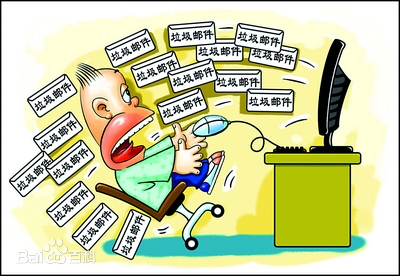



#  <font color=#0099ff  face="微软雅黑"><center>实验八 Naive Bayesian 垃圾邮件分类预测</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过用NB算法对垃圾邮件进行分类、掌握导入数据、预处理数据、模型训练、模型评估、模型优化、可视化方法。
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows Anconda  scikit-learn Jupyter Notebook </div>
    
### 【实验内容】

本实验用Sklearn模块的朴素贝叶斯对垃圾邮件进行分类预测


### 【预备知识】

机器学习流程、特征工程技巧、分类模型评价、NB算法


### 【实验背景】

随着互联网的不断发展，电子邮件因其快速便捷的沟通方式也在人们生活和工作中扮演着不可替代的角色。与此同时，大量的垃圾邮件却不断充斥着我们的邮箱，严重影响了正常邮件的往来收发。来自于中国互联网协会（ISC）发布的《2011 年第四季度中国反垃圾邮件状况调查报告》的数据显示，中国网民每人每周平均收到垃圾邮件的数量为 16.4 封，垃圾邮件占比 35.5%。虽然与往年同期数据相比略有下降，但是反垃圾邮件的工作还任重而道远。在信息系统中，过滤垃圾邮件的方法有基于机器学习的方法，即基于大量正常邮件和垃圾邮件组成的邮件集合训练分类模型，根据分类模型自动进行垃圾邮件识别。这种方法时效性强，误判率低。本次实验根据数据集构建朴素贝叶斯分类模型，自动进行垃圾邮件识别

## 数据介绍

### Ham: 正常邮件     用0表示
### Spam: 垃圾邮件   用1表示


# 【实验步骤】

## 8. Naive Bayesian 垃圾邮件识别

## 8-1 读取数据

In [11]:
# 导入包
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
# 读取txt文件，并输出前五行数据
data = pd.read_table('Spam.txt',names=['label','message'])
"""
# 指定要读取的列
desired_columns = ['label', 'col2']
result = df[desired_columns]

"""
data.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

## 8-2 查看数据基本信息

In [26]:
#查看数据大小
data.shape

(5572, 2)

In [27]:
# 一次性查看数据的特征、是否有缺失值、数据类型
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
# 查看整个数据集是否存在重复值
data.duplicated().any()


True

In [30]:
#去掉数据集中存在的重复行
data = data.drop_duplicates()


In [31]:
#重新查看数据大小，来了解去除了多少重复数据
data.shape


(5169, 2)

In [45]:
# 将label列中的ham 和 spam 转换成0，1, 展示新数据集的前6行
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data["label"])
data.head(6)

label                                            message  target
0   ham  Go until jurong point, crazy.. Available only ...       0
1   ham                      Ok lar... Joking wif u oni...       0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       1
3   ham  U dun say so early hor... U c already then say...       0
4   ham  Nah I don't think he goes to usf, he lives aro...       0
5  spam  FreeMsg Hey there darling it's been 3 week's n...       1

In [40]:
# 查看垃圾邮件和正常邮件的数量
target_names = data.groupby("target").size()
target_names



target
0    4516
1     653
dtype: int64

## 8-3 数据可视化

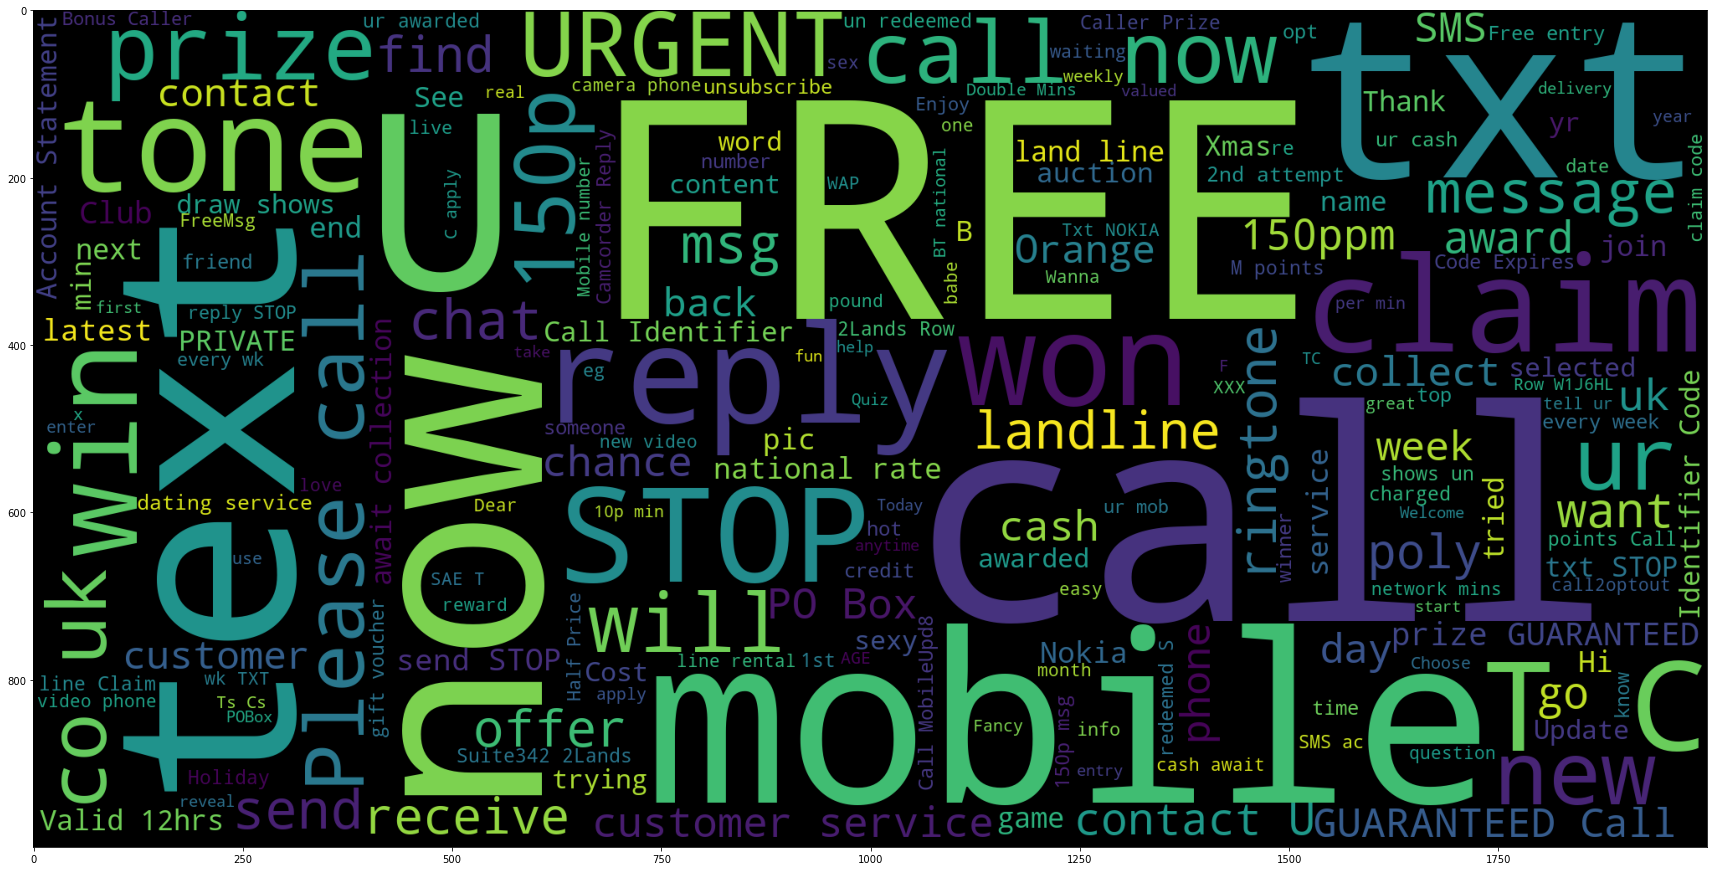

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


plt.figure(figsize=(30,30))
wc=WordCloud(width=2000,height=1000,background_color='black')


# Note :- .str -> used to convert 'series' object into 'string'
# .cat() -> used to seprate each records by " " (space)


spam_wc=wc.generate(data[data['label']=='spam']['message'].str.cat(sep=" "))
spam_wc

plt.imshow(spam_wc)
plt.show()

# 观察词云图回答：垃圾邮件的敏感词汇都有哪些？

### 答案: 

In [ ]:
词汇越大，词汇越敏感。
敏感词汇有FREE、Call、now、mobile、text、U

## 8-4 模型训练

### 8-4-1 拆分上面新的数据集

In [47]:
#将数据拆分成属性X,标签y
x = data(['message'],axis=1)
y = data(['target'])

TypeError: 'DataFrame' object is not callable

In [16]:
#将数据按照测试集30%，训练集70%进行划分






In [17]:
# 向量化，将原始文本转化为tf-idf 特征矩阵
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x_train)
XT= vectorizer.transform(x_test)

## 8-5 使用朴素贝叶斯进行预测

## sklearn提供了三种朴素贝叶斯模型，选择一个最适合的用作垃圾邮件分类预测。请在下方框回答你选择的模型以及原因

### 答案：


In [18]:
#导入合适的贝叶斯模型进行预测











## 8-6 模型评估

In [19]:
## 利用accuracy（准确度）评估模型效果




The accuracy of the NB is: 0.9593810444874274


In [20]:
## 利用混淆矩阵来评估模型效果





The confusion matrix result:
 [[1371   63]
 [   0  117]]


In [21]:
# 评估报告






              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1371
           1       1.00      0.65      0.79       180

    accuracy                           0.96      1551
   macro avg       0.98      0.82      0.88      1551
weighted avg       0.96      0.96      0.96      1551



# 8-7 模型落地应用

##  小王邮箱收到了两封邮件，其中第一封邮件内容为：'Urgent: hello, Your mobile was awarded a Prize!'， 第二封邮件内容为： 'hello,how are you'， 请用你的模型帮他预测这两封邮件是正常邮件还是垃圾邮件？

In [23]:
# 预测








[1 0]


### 请问系统应该屏蔽第一封邮件还是第二封邮件？

### 答案：